In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Load the dataset
data = pd.read_csv('game_dataset.csv')

# Split the data into features (X) and labels (y)
X = data[['age', 'stepCount', 'duration']]
y = data['level']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adjust the labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Create the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 output units for 5 levels
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with adjusted labels
model.fit(X_train, y_train_adjusted, epochs=100, batch_size=32, validation_data=(X_test, y_test_adjusted))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_adjusted)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 1.2733 - accuracy: 0.5850 - val_loss: 1.1352 - val_accuracy: 0.6050
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9910 - accuracy: 0.6325 - val_loss: 0.9104 - val_accuracy: 0.6100
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.6612 - val_loss: 0.7488 - val_accuracy: 0.6800
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.7200 - val_loss: 0.6356 - val_accuracy: 0.7350
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.7525 - val_loss: 0.5545 - val_accuracy: 0.7600
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.7788 - val_loss: 0.4859 - val_accuracy: 0.8000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8213 - val_loss: 0.4299 - val_accuracy: 0.8450
Epoch 8/100


In [2]:
!pip install matplotlib


In [3]:
model.save('level.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [5]:
history = model.fit(X_train, y_train_adjusted, epochs=100, batch_size=32, validation_data=(X_test, y_test_adjusted))

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/100

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_adjusted)
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 3.5953e-04 - accuracy: 1.0000
Test Accuracy: 1.0


In [7]:
# Calculate F1 score for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test_adjusted, y_pred_classes, average='weighted')
print(f"Test F1 Score: {f1}")

7/7 [==============================] - 0s 2ms/step
Test F1 Score: 1.0


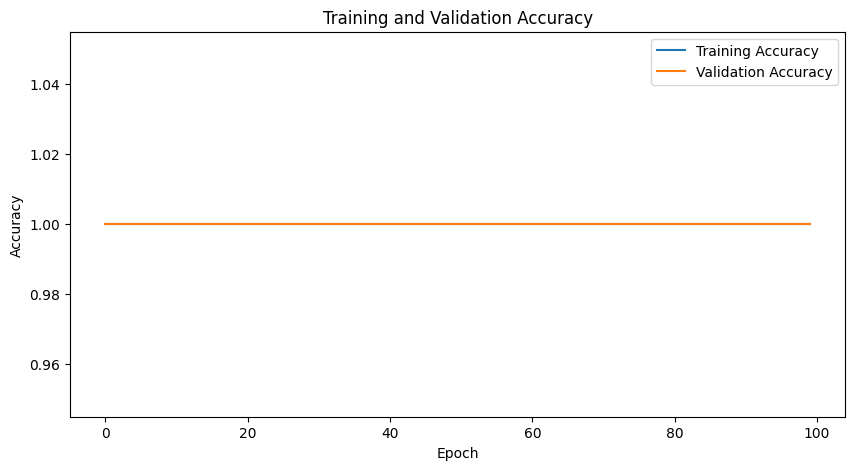

In [8]:
# Plot accuracy over training epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Modal application

In [10]:
# Input sample data for prediction
sample_data = np.array([[10, 34, 200]])  # Replace with your desired input values

# Standardize the sample data using the same scaler used for training
sample_data_scaled = scaler.transform(sample_data)

# Make predictions
predicted_probabilities = model.predict(sample_data_scaled)
predicted_class = np.argmax(predicted_probabilities, axis=1) + 1  # Adding 1 to match your original label encoding

# Convert the predicted class to the corresponding level
level_mapping = {1: 'Level 1', 2: 'Level 2', 3: 'Level 3', 4: 'Level 4', 5: 'Level 5'}
predicted_level = level_mapping.get(predicted_class[0], 'Unknown')

# Print the results
print(f"Predicted Class: {predicted_class[0]}")
print(f"Predicted Level: {predicted_level}")

1/1 [==============================] - 0s 22ms/step
Predicted Class: 2
Predicted Level: Level 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
